##  决策树的一般流程
#### （1）收集数据：可以使用任何方法
#### （2）准备数据： 树构造算法值适用于标称型数据（结果只在有限目标集中取，如真与假），因此数值型数据必须离散化
#### （3）分析数据： 构造树完成之后，应该检查图形是否符合预期
#### （4）训练算法：构造树的数据结构
#### （5）测试算法：使用经验树计算错误率
#### （6）使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义

## 创建分支的伪代码递归函数 createBranch():

#### 检测数据集中的每个子项是否属于同一分类：
####    &emsp;If so return 类标签
####   &emsp;Else
####   &emsp;&emsp;寻找划分数据集的最好特征
####   &emsp;&emsp;划分数据集
####   &emsp;&emsp; 创建分支节点
####    &emsp;&emsp; for 每个划分的子集
####    &emsp;&emsp; &emsp; 调用函数createBranch并增加返回结果到分支节点中
####    &emsp;&emsp; return 分支节点


In [74]:
补充功能：　在 Markdown 文档中，可以直接采用 HTML 标记插入空格（blank space），而且无需任何其他前缀或分隔符。具体如下所示：

插入一个空格 (non-breaking space)
　　　　&nbsp;    或    &#160;     或      &#xA0;

插入两个空格 (en space)
　　　　&ensp;     或    &#8194;   或      &#x2002;

插入四个空格 (em space)
　　　　&emsp;    或    &#8195;   或      &#x2003;

插入细空格 (thin space)
　　　　&thinsp;   或     &#8201;  或      &#x2009;

SyntaxError: invalid character in identifier (<ipython-input-74-cb7f8657b654>, line 1)

## 程序清单3-1 计算给定数据集的香农熵
###   熵(entropy)定义为信息的期望值：   &emsp;    $l(x_{i})=-\log_{2} p(x_{i})$
###  计算熵，需要计算所有类别所有可能值包含的信息期望值：
### &emsp; $H = -\sum_{i=1}^{n}p(x_{i})\log_{_{2}}p(x_{i})$

In [75]:
from math import log
def calcShannonEnt(dataSet):          #熵（entropy）：定义为信息的期望值   信息增益（information gain）
    numEntries = len(dataSet)
    #print(numEntries)
    labelCounts={}
    #print(labelCounts)
    for featVec in dataSet:
        currentLabel = featVec[-1]
        #print(currentLabel)
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1
        #print(labelCounts)   # 字典
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)   #(-0.4*log(0.4,2)-0.6*log(0.6,2))
    return shannonEnt


In [76]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']  
    return dataSet, labels
myDat,labels = createDataSet()

In [77]:
 calcShannonEnt(myDat)

0.9709505944546686

In [78]:
print(-0.4*log(0.4,2)-0.6*log(0.6,2))
# 熵越高，则混合的数据也越多

0.9709505944546686


In [79]:
myDat[0][-1] = 'maybe'
myDat[0][1] = 1
myDat


[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [80]:
 calcShannonEnt(myDat)

1.3709505944546687

In [81]:
# 熵越高，则混合的数据也越多,得到熵之后，我们就可以按照获取最大信息增益的方法划分数据集

##  程序清单3-2 按照给定特征划分数据集

In [82]:
# 参数说明： 待划分的数据集，划分数据集的特征，需要返回的特征值
def splitDataSet(dataSet,axis,value):
    retDataSet = []                  # 创建list新对象
    '''
    for featVec in dataSet:
        print(featVec)
        if featVec[axis] == value:
            print(featVec[axis])
            reducedFeatVec = featVec[:axis]
            print(reducedFeatVec)
            reducedFeatVec.extend(featVec[axis+1:])
            print(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)         # 抽取
            print(retDataSet)
    '''
    for featVec in dataSet: #dataset中各元素是列表,遍历每个列表
        if featVec[axis] == value: #找出第axis元素为value的行
            reducedFeatVec = featVec[:axis]   #抽取符合特征的数据,切片
            reducedFeatVec.extend(featVec[axis+1:]) #把抽取出该特征以后的所有特征组成一个列表
            retDataSet.append(reducedFeatVec)   #创建抽取该特征以后的dataset
   
    return retDataSet
myDat,labels = createDataSet()
print(myDat)
print(splitDataSet(myDat,0,1) )
print(splitDataSet(myDat,0,0))
print(labels)
print(labels[0])

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no']]
[[1, 'no'], [1, 'no']]
['no surfacing', 'flippers']
no surfacing


## 程序清单3-3 选择最好的数据集划分方式

In [83]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        #语句featList = [example[i] for example in dataSet]作用为：
        #将dataSet中的数据先按行依次放入example中，然后取得example中的example[i]元素，放入列表featList中
        #语句classList = [example[-1] for example in dataSet]作用为：
        #将dataSet中的数据先按行依次放入example中，然后取得example中的example[-1]元素，放入列表classList中
        #对数据的遍历一般都是按行，这是取其列的方法！！
        #print(featList)
        #创建唯一的分类标签列表
        uniqueVals = set(featList)           
        #计算每种划分方式的信息熵
        newEntropy = 0.0
        for value  in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy+=prob * calcShannonEnt(subDataSet)
        #计算最好的信息增益
        infoGain = baseEntropy - newEntropy
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

chooseBestFeatureToSplit(myDat)


0

In [84]:
import operator
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        #print(vote)
        if vote not in classCount.keys(): classCount[vote]=0
        classCount[vote] += 1
        #print(classCount)
    #sortedClassCount = sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    print(sortedClassCount)
    return sortedClassCount[0][0]

classList = [example[-1] for example in myDat]
majorityCnt(classList)

[('no', 3), ('yes', 2)]


'no'

## 程序清单3-4 创建树的函数代码


In [85]:
# 函数参数： 数据集 和 标签列表
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    print(classList)
    print(classList.count(classList[0]))
    print(len(classList))
    # 类别完全相同泽停止继续划分
    if classList.count(classList[0]) == len(classList):
        return classList[0] 
    # 遍历完所有特征时返回出现次数最多的
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)  #majorityCnt 挑选出现次数最多的类别作为返回值
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    # 得到列表包含的所有属性值
    featValues = [example[bestFeat] for example in dataSet]
    #print(featValues)
    uniqueVals = set(featValues)
    #print(uniqueVals)
    for value in uniqueVals:
        subLabels = labels[:]
        #print(subLabels)
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
        print(bestFeatLabel)
        print(value)
        #print(myTree[bestFeatLabel][value])
        #[[1, 'no'], [1, 'no']]  print(splitDataSet(myDat,0,0))
        #[[1, 'yes'], [1, 'yes'], [0, 'no']]  print(splitDataSet(myDat,0,1) )
    return myTree

createTree(myDat,labels)

#myDat = [[1, 'no'], [1, 'no']]
#classList = [example[-1] for example in myDat]
#print(classList)

['yes', 'yes', 'no', 'no', 'no']
2
5
['no', 'no']
2
2
no surfacing
0
['yes', 'yes', 'no']
2
3
['no']
1
1
flippers
0
['yes', 'yes']
2
2
flippers
1
no surfacing
1


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

## 程序清单3-5 使用文本注解绘制树节点 annotations


In [86]:

import matplotlib.pyplot as plt
# 定义文本框 和箭头格式
decisionNode = dict(boxstyle="sawtooth",fc = "0.8") 
# 创建字典。 boxstyle=”sawtooth” 表示 注解框的边缘是波浪线，fc=”0.8” 是颜色深度
#help(dict)
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle = "<-")


'''
函数说明：使用matplotlib绘制树节点
参数：nodeText -- 节点注解
      centerPt -- 子节点
      parentPt -- 父节点
      nodeType -- 节点类型
返回值： 无

'''
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    

# node_txt: 节点的名字；
# xy: 被注解的东西的位置，在决策树中为上一个节点的位置
# xycoords:被注解的东西依据的坐标原点位置，是以图像还是坐标轴
# xytext: 注解内容的中心坐标
# textcoords:注解内容依据的坐标原点位置
# va: horizontal alignment 文本中内容竖向对齐方式
# ha: vertical alignment 文本中的内容 横向对齐方式
# arrowprops: 标记线的类型，是一个字典，如果字典中包含key为arrowstyle的，则默认类别有'->'等
# bbox: 对方框的设置
#https://matplotlib.org/users/annotations_guide.html 说明文档


#plotNode函数有nodeTxt,centerPt, parentPt, nodeType这四个参数。
 # nodeTxt是注释的文本信息。centerPt表示那个节点框的位置。
#  parentPt表示那个箭头的起始位置（终点坐标）。nodeType表示的是节点的类型，
#  也就会用我们之前定义的全局变量。
#xytext是起点坐标  
#va="center",ha="center"是坐标的水平中心和垂直中心
#annotate是注释的意思,也就是作为原来那个框的注释，也是添加一些新的东西
#arrowprops=arrow_args是标记线的类型，


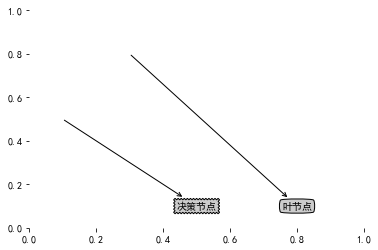

In [87]:
def createPlot():
    fig = plt.figure(1,facecolor='white')# 创建一个新图形
    fig.clf()#  清空绘图区
    plt.rcParams['font.sans-serif'] = 'SimHei'  #设置中文显示
    createPlot.ax1 = plt.subplot(111,frameon = False) 
    #创建1行1列 从第一个子图开始叠加图层时 frameon必须设置成False，不然会覆盖下面的图层
    plotNode('决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

createPlot()

## 程序清单3-6 获取叶节点的数目和树的层数

In [88]:
def getNumLeafs(myTree):
    numLeafs = 0
    #print(myTree.keys())
    firstStr = list(myTree.keys())[0]  # 找到输入的第一个元素,第一个关键词为划分数据集类别的标签
    #print(firstStr)
    # python3改变了dict.keys,返回的是dict_keys对象,支持iterable 但不支持indexable，将其明确的转化成list：
    secondDict = myTree[firstStr]   #myTree经过第一个特征值分类后的字典
    #print(secondDict)  
    for key in secondDict.keys():
        # 测试节点的数据类型是否为字典
        if type(secondDict[key]).__name__=='dict': 
            # type(secondDict[key]).__name__输出的是括号里面的变量的类型，即判断secondDict[key]对应的内容是否为字典类型
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        # 测试节点的数据类型是否为字典
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:    thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [89]:
myTree = retrieveTree(0)
print(getNumLeafs(myTree))
print(getTreeDepth(myTree))

3
2


## 程序3-7 plotTree 函数

In [93]:
# 在父子节点间填充文本信息
def plotMidText(cntrPt,parentPt,txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString,va="center", ha="center", rotation=30)#  在两个节点之间的线上写上字
  
    
def plotTree(myTree,parentPt,nodeTxt):
    # 计算宽与高
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 +float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    #cntrPt用来记录当前要画的树的树根的结点位置
    # plotTree.xOff和plotTree.yOff是用来追踪已经绘制的节点位置，plotTree.totalW为这个数的宽度，叶节点数
    #cntrPt用来记录当前要画的树的树根的结点位置在plotTree函数中，它是这样计算的
    # cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW, plotTree.yOff)
    # numLeafs记录当前的树中叶子结点个数。我们希望树根在这些所有叶子节点的中间
    # plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW 这里的
    # 1.0 + numLeafs 需要拆开来理解，也就是
    # plotTree.xOff + float(numLeafs) / 2.0 / plotTree.totalW + 1.0 / 2.0 / plotTree.totalW
    # plotTree.xOff + 1 / 2 * float(numLeafs) / plotTree.totalW + 0.5 / plotTree.totalW
    # 因为xOff的初始值是 - 0.5 / plotTree.totalW ，是往左偏了0.5 / plotTree.tatalW的，
    # 这里正好加回去。这样cntrPt记录的x坐标正好是所有叶子结点的中心点'''

    
    #标记子节点属性值
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode) #firstStr为需要显示的文本，cntrPt为文本的中心点，
                                                   # parentPt为箭头指向文本的起始点，decisionNode为文本属性
    secondDict = myTree[firstStr]  #子树
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD  #totalD是这个树的深度，深度移下一层,初始值为1
    # 减少y的值，将树的总深度平分，每次减少移动一点(向下，因为树是自顶向下画的）
    for key in secondDict.keys():
        # 测试节点的数据类型是否为字典
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else: 
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW #x坐标平移一个单位
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)#画叶节点
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))#显示箭头文本
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD   #下移一层深度

def createPlot(inTree):
    fig = plt.figure(1,facecolor='white')# 创建一个新图形
    fig.clf()#  清空绘图区
    #plt.rcParams['font.sans-serif'] = 'SimHei'  #设置中文显示
    axprops = dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree)) # 创建两个全局变量存储树的宽度和深度
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;# 追踪已经绘制的节点位置 初始值为 将总宽度平分 在取第一个的一半
    plotTree(inTree, (0.5,1.0), '')   # 1.0  写成0.1 导致错误 调试好久
    plt.show()


E:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


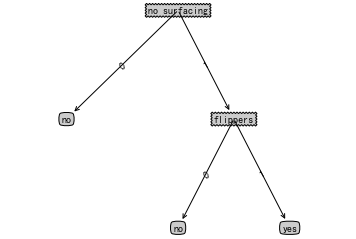

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

In [91]:
createPlot(myTree)
myTree['no surfacing'][3] = 'maybe'
myTree

E:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


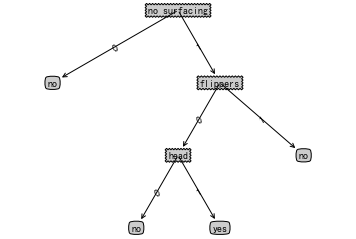

In [92]:
myTree = retrieveTree(1)
createPlot(myTree)

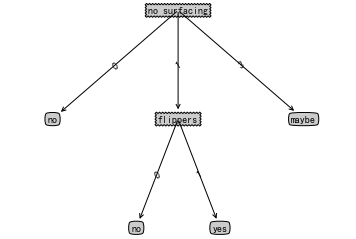

In [285]:

def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )
    
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
#if you do get a dictonary you know it's a tree, and the first element will be another dict

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()
createPlot(myTree)

#myTree = retrieveTree(1)
#createPlot(myTree)

In [279]:
def classify(inputTree,featLabels,testVec):
    firstStr = list(inputTree.keys())[0]
    print(firstStr)
    secondDict = inputTree[firstStr]
    print(secondDict)
    featIndex = featLabels.index(firstStr)
    print(featIndex)
    print(secondDict.keys())
    for key in secondDict.keys():
        print(secondDict[key]) 
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ =='dict':
                classLabel = classify(secondDict[key],featLabels,testVec)
            else:   classLabel = secondDict[key] 
    return classLabel
myDat,labels = createDataSet()
myTree = retrieveTree(0)
classify(myTree,labels,[1,0])


no surfacing
{0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}
0
dict_keys([0, 1])
no
{'flippers': {0: 'no', 1: 'yes'}}
flippers
{0: 'no', 1: 'yes'}
1
dict_keys([0, 1])
no
yes


'no'

In [236]:
classify(myTree,labels,[1,1])

no surfacing
{0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}
0
dict_keys([0, 1])
no
{'flippers': {0: 'no', 1: 'yes'}}
flippers
{0: 'no', 1: 'yes'}
1
dict_keys([0, 1])
no
yes


'yes'

In [237]:
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'wb+')  #Python3.6.1版本。
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr = open(filename,'rb') 
    return pickle.load(fr)
    

In [238]:
storeTree(myTree,'classifierStrorage.txt')
grabTree('classifierStrorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

##  使用决策树预测隐形眼镜类型

In [96]:
fr = open('lenses.txt')

In [97]:
lenses =[inst.strip().split('\t') for inst in fr.readlines()] #把文件中的每一行读为一个列表


In [98]:
print(lenses)

[['young', 'myope', 'no', 'reduced', 'no lenses'], ['young', 'myope', 'no', 'normal', 'soft'], ['young', 'myope', 'yes', 'reduced', 'no lenses'], ['young', 'myope', 'yes', 'normal', 'hard'], ['young', 'hyper', 'no', 'reduced', 'no lenses'], ['young', 'hyper', 'no', 'normal', 'soft'], ['young', 'hyper', 'yes', 'reduced', 'no lenses'], ['young', 'hyper', 'yes', 'normal', 'hard'], ['pre', 'myope', 'no', 'reduced', 'no lenses'], ['pre', 'myope', 'no', 'normal', 'soft'], ['pre', 'myope', 'yes', 'reduced', 'no lenses'], ['pre', 'myope', 'yes', 'normal', 'hard'], ['pre', 'hyper', 'no', 'reduced', 'no lenses'], ['pre', 'hyper', 'no', 'normal', 'soft'], ['pre', 'hyper', 'yes', 'reduced', 'no lenses'], ['pre', 'hyper', 'yes', 'normal', 'no lenses'], ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'no', 'normal', 'no lenses'], ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'], ['presbyopic', 'myope', 'yes', 'normal', 'hard'], ['presbyopic', 'hyper', 'no', 'redu

In [101]:
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses, lensesLabels)
print(lensesTree)

['no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'hard', 'no lenses', 'soft', 'no lenses', 'no lenses']
15
24
['no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses', 'no lenses']
12
12
tearRate
reduced
['soft', 'hard', 'soft', 'hard', 'soft', 'hard', 'soft', 'no lenses', 'no lenses', 'hard', 'soft', 'no lenses']
5
12
['soft', 'soft', 'soft', 'soft', 'no lenses', 'soft']
5
6
['soft', 'soft']
2
2
age
pre
['soft', 'soft']
2
2
age
young
['no lenses', 'soft']
1
2
['no lenses']
1
1
prescript
myope
['soft']
1
1
prescript
hyper
age
presbyopic
astigmatic
no
['hard', 'hard', 'hard', 'no lenses', 'hard', 'no lenses']
4
6
['hard', 'hard', 'hard']
3
3
prescript
myope
['hard', 'no lenses', 'no lenses']
1
3
['no lenses']
1
1
age
pre
['hard']
1
1
age
you

E:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


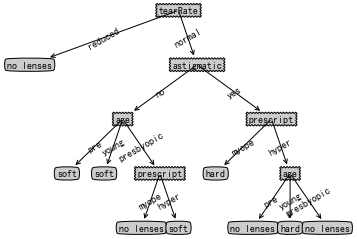

In [102]:
createPlot(lensesTree)